# Short introduction to working with DEMs in Python GDAL

Greg Tucker, CU Boulder, Feb 2016

## Install GDAL library

You'll need to install the GDAL library. If you have Anaconda installed, you can do this from the command line by:

``conda install gdal``

## Download some DEM data to work with

Navigate a browser to ``http://criticalzone.org/boulder/data/dataset/2915/``

Select *Betasso (Snow off - filtered) - 1m Filtered DSM*

Save the zip file, and double-click to unzip it. Inside the folder ``img`` you will see a file called ``czo_1m_bt1.img``. This is a 1 m resolution lidar-derived DEM of a stretch of Boulder Creek Canyon, with the small Betasso tributary catchment located roughly in the center.

## Import the GDAL library

Here we import GDAL and NumPy.

In [9]:
from osgeo import gdal
import numpy as np

## Open and read data from the DEM

Change the path name below to reflect your particular computer, then run the cell.

In [23]:
betasso_dem_name = '/Users/gtucker/Dev/dem_analysis_with_gdal/czo_1m_bt1.img'

In [24]:
geo = gdal.Open(betasso_dem_name)
zb = geo.ReadAsArray()

If the previous two lines worked, ``zb`` should be a 2D numpy array that contains the DEM elevations. There are some cells along the edge of the grid with invalid data. Let's set their elevations to zero, using the numpy ``where`` function:

In [25]:
zb[np.where(zb<0.0)[0],np.where(zb<0.0)[1]] = 0.0

Now let's make a color image of the data. To do this, we'll need Pylab and a little "magic".

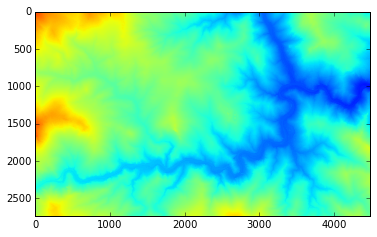

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(zb, vmin=1600.0, vmax=2350.0)

### Questions:

(Note: to answer the following, open Google Earth and enter Betasso Preserve in the search bar. Zoom out a bit to view the area around Betasso)

(1) Use a screen shot to place a copy of this image in your lab document. Label Boulder Creek Canyon and draw an arrow to show its flow direction.

(2) Indicate and label the confluence of Fourmile Creek and Boulder Canyon.

(3) What is the mean altitude? What is the maximum altitude? (Hint: see numpy functions ``mean`` and ``amax``)

In [29]:
np.amax(zb)

2223.342

## Make a slope map

Use the numpy ``gradient`` function to make an image of absolute maximum slope angle at each cell:

In [30]:
def slope_gradient(z):
    """
    Calculate absolute slope gradient elevation array.
    """
    x, y = np.gradient(z)  
    #slope = (np.pi/2. - np.arctan(np.sqrt(x*x + y*y)))
    slope = np.sqrt(x*x + y*y)
    return slope

In [31]:
sb = slope_gradient(zb)

Let's see what it looks like:

0.436597


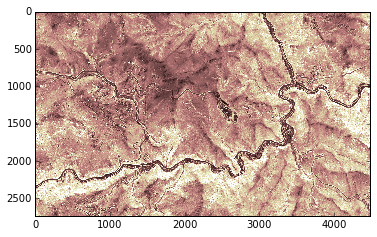

In [32]:
plt.imshow(sb, vmin=0.0, vmax=1.0, cmap='pink')

### Questions:

(1) Place a copy of this image in your lab document. Identify and label the Betasso Water Treatment plant.

(2) How many degrees are in a slope gradient of 1.0 (or 100%)?

(3) What areas have the steepest slopes? What areas have the gentlest slopes? What do you think the distribution of slopes might indicate about the distribution of erosion rates within this area?

(4) What is the median slope gradient? What is this gradient in degrees? (Hint: numpy has a ``median`` function)

## Make a map of slope aspect

In [33]:
def aspect(z):
    """Calculate aspect from DEM."""
    x, y = np.gradient(z)
    return np.arctan2(-x, y)

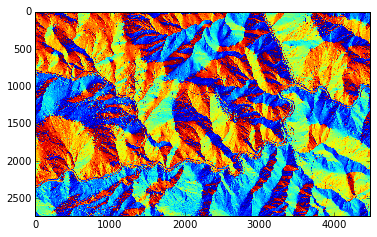

In [34]:
ab = aspect(zb)
plt.imshow(ab)

We can make a histogram (frequency diagram) of aspect. Here 0 degrees is east-facing, 90 is north-facing, 180 is west-facing, and -90 is south-facing.

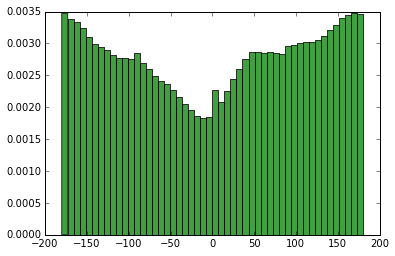

In [36]:
abdeg = (180./np.pi)*ab # convert to degrees
n, bins, patches = plt.hist(abdeg.flatten(), 50, normed=1, facecolor='green', alpha=0.75)

### Questions:

(1) Place a copy of this image in your lab notes.

(2) Compare the aspect map to imagery in Google Earth. Is there any correlation aspect and vegetation? If so, what does it look like?

(3) What is the most common aspect? (N, NE, E, SE, S, SW, W, or NW)

## Shaded relief

Create a shaded relief image

In [37]:
def hillshade(z, azimuth=315.0, angle_altitude=45.0):  
    """Generate a hillshade image from DEM.
    
    Notes: adapted from example on GeoExamples blog,
    published March 24, 2014, by Roger Veciana i Rovira.
    """
    x, y = np.gradient(z)  
    slope = np.pi/2. - np.arctan(np.sqrt(x*x + y*y))  
    aspect = np.arctan2(-x, y)  
    azimuthrad = azimuth*np.pi / 180.  
    altituderad = angle_altitude*np.pi / 180.
   
    shaded = np.sin(altituderad) * np.sin(slope)\
     + np.cos(altituderad) * np.cos(slope)\
     * np.cos(azimuthrad - aspect)  
    return 255*(shaded + 1)/2

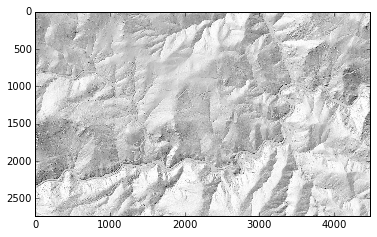

In [38]:
hb = hillshade(zb)
plt.imshow(hb, cmap='gray')

### Questions:

(1) Place a copy of this image in your lab document. Label at least one area of relatively smooth terrain, and one area of relatively rough terrain.

(2) Do the areas of smooth and rough topography bear any relation to other geomorphic features?

(3) Note in your document any other observations, comments, or questions that have occurred to you while examining these data.